In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

### EDA

In [67]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
df.shape

(891, 12)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot: xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot: xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot: xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot: xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot: xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot: xlabel='Age', ylabel='Survived'>,
        <AxesSubplot: xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot: xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot: xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot: xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot: xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot: xlabel='

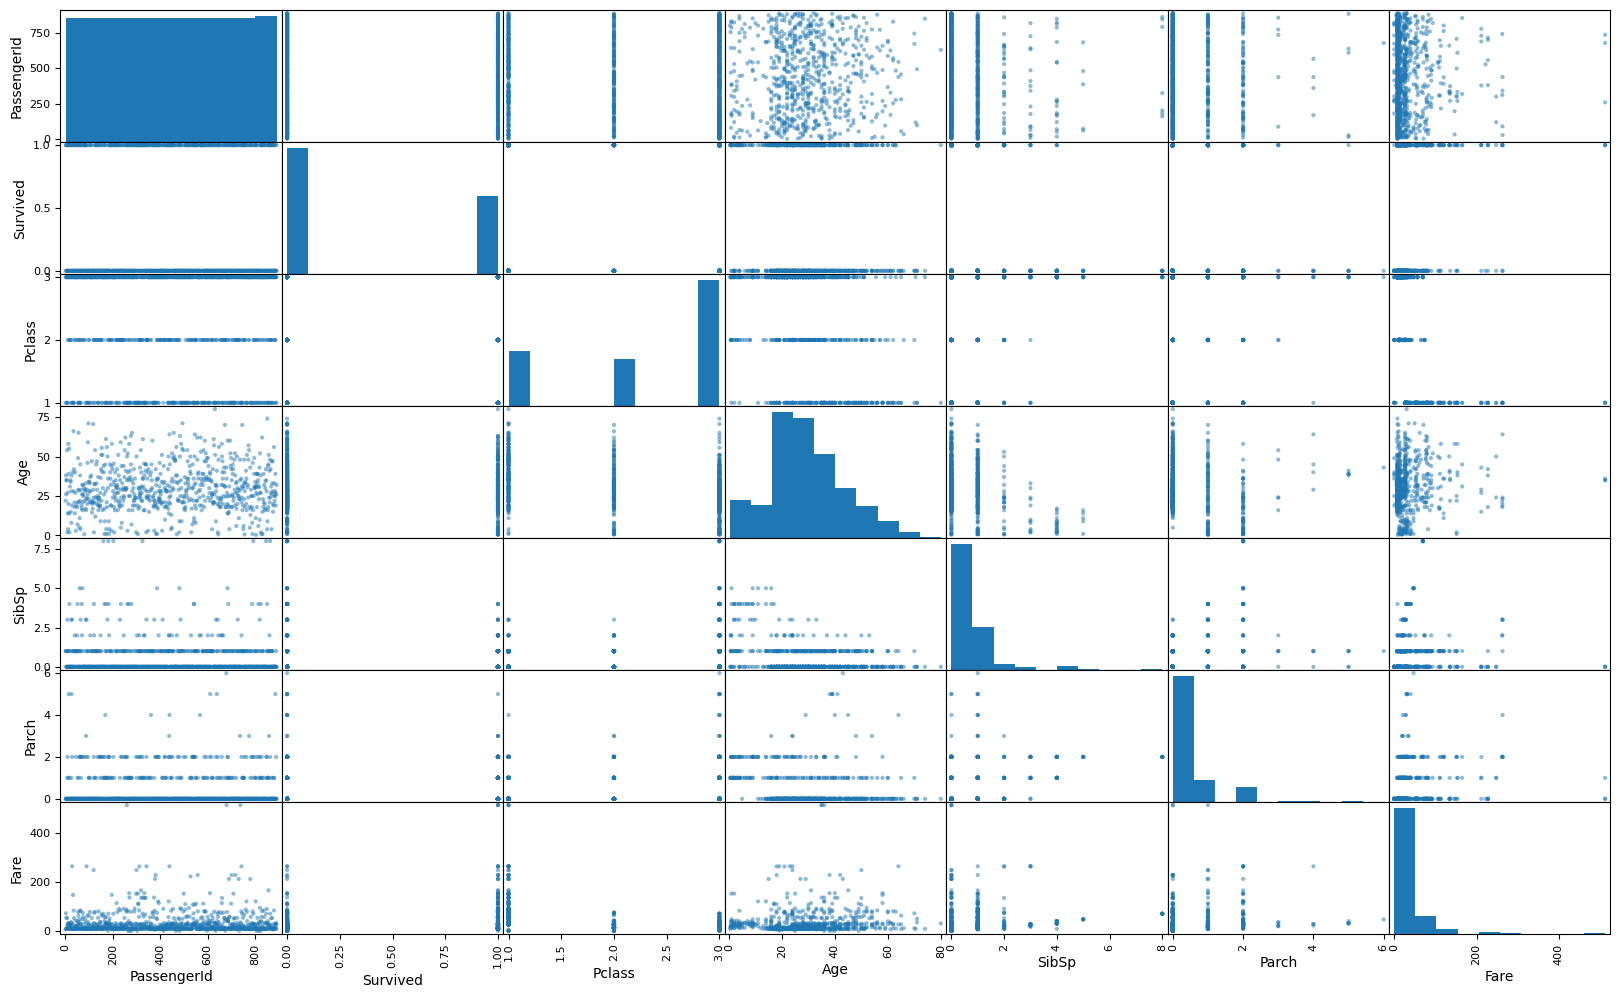

In [73]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,12))

In [74]:
len(df['Cabin'].unique())

148

In [75]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [76]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44314c8790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44314c8cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44314c84f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44314c9210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44314c94b0>],
 'means': []}

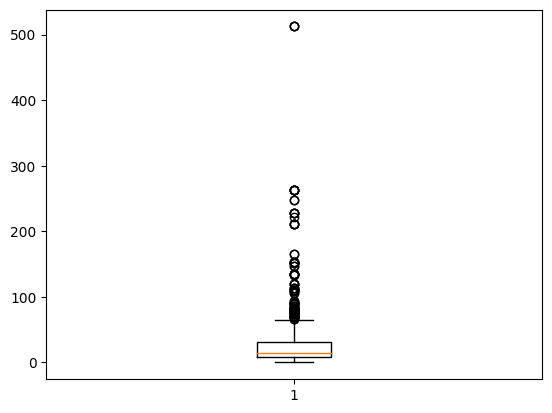

In [77]:
plt.boxplot(df['Fare'])

In [78]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [79]:
df[df['Fare']>200]['Fare'].count()

20

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4431515f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4431516410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4431515d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4431516860>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4431516b00>],
 'means': []}

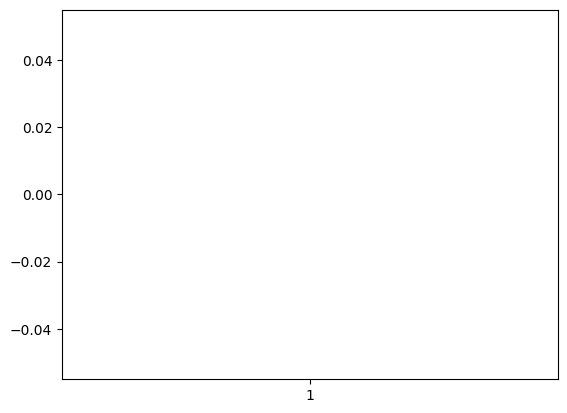

In [80]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f443156b430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f443156b970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f443156b190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f443156beb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44313a0190>],
 'means': []}

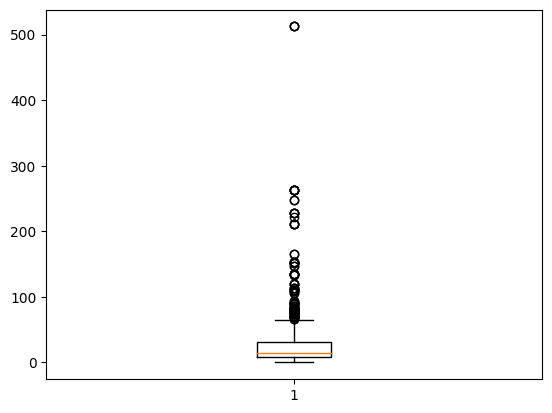

In [81]:
plt.boxplot(df['Fare'])

### Feature Engineering

In [82]:
#droping Name, Ticket and Embarked because they don't give extra information, Cabin because too much nans
df=df.drop(['Name','Ticket','Embarked','Cabin'],axis=1)

In [83]:
#doing the same for the test data
df_test=df_test.drop(['Name','Ticket','Embarked','Cabin'],axis=1)

In [84]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [85]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [86]:
df[df['Survived']==0]['Age'].median()

28.0

In [87]:
df[df['Survived']==1]['Age'].median()

28.0

In [102]:
si=SimpleImputer(strategy="median")

In [103]:
#imputing median to Age nan values
df['Age']=si.fit_transform(df[['Age']])
df_test['Age']=si.transform(df_test[['Age']])

In [104]:
df[['Age']]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


In [105]:
#outliers. Threshold=200. All numbers greater than 200 are set to 200
df.loc[df['Fare']>200,'Fare']=200
df_test.loc[df_test['Fare']>200,'Fare']=200

In [106]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [107]:
#Onehotencoding
ohe=OneHotEncoder(drop='first',sparse=False)

In [108]:
X['Sex']=ohe.fit_transform(df[['Sex']])

/home/manuelquiros/Documents/VENVS/KaggleTitanic/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [109]:
X.columns.to_list()

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [110]:
ct = ColumnTransformer([('numeric',StandardScaler(), ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])])

In [111]:
ct.fit_transform(X)

array([[ 0.82737724,  0.73769513, -0.56573646,  0.43279337, -0.47367361,
        -0.59805369],
       [-1.56610693, -1.35557354,  0.66386103,  0.43279337, -0.47367361,
         1.05446041],
       [ 0.82737724, -1.35557354, -0.25833709, -0.4745452 , -0.47367361,
        -0.58063389],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 ,  0.43279337,  2.00893337,
        -0.17997859],
       [-1.56610693,  0.73769513, -0.25833709, -0.4745452 , -0.47367361,
        -0.01094205],
       [ 0.82737724,  0.73769513,  0.20276197, -0.4745452 , -0.47367361,
        -0.58515014]])

In [116]:
X = pd.DataFrame(ct.fit_transform(X),columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])

In [117]:
df_test['Sex']=ohe.transform(df_test[['Sex']])

In [118]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    float64
 1   Sex     891 non-null    float64
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    float64
 4   Parch   891 non-null    float64
 5   Fare    891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


In [119]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [120]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    float64
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 23.0 KB


In [121]:
df_test[df_test['Fare'].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
152,1044,3,1.0,60.5,0,0,NaN


In [122]:
df_test['Fare']=si.fit_transform(df_test[['Fare']])

No scaling in necesary for Desicion trees

### Train-test split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [124]:
X_train.shape

(668, 6)

In [125]:
X_test.shape

(223, 6)

In [126]:
y_train.shape

(668,)

In [127]:
y_test.shape

(223,)

In [128]:
X_test.to_csv('X_test.csv')
X_train.to_csv('X_train.csv')
y_test.to_csv('y_test.csv')
y_train.to_csv('y_train.csv')


In [129]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1.0,34.5,0,0,7.8292
1,893,3,0.0,47.0,1,0,7.0000
2,894,2,1.0,62.0,0,0,9.6875
3,895,3,1.0,27.0,0,0,8.6625
4,896,3,0.0,22.0,1,1,12.2875


In [130]:
df_test.to_csv('X_val.csv')